# Main Notebook

File to perform experiments

## Imports

In [1]:
!pip gpflow --version

ERROR: unknown command "gpflow"


In [80]:
import os
import numpy as np
import gpflow
import matplotlib.pyplot as plt
import pandas as pd
import time
from tqdm import tqdm
import tensorflow as tf

from models.GaussianProcess import GaussianProcess
from acquisition_functions.UseMO import usemo_acq
from acquisition_functions.MES import mes_acq, basic_mes_acq
from acquisition_functions.PESMO import pesmo_acq
from acquisition_functions.MESMO import mesmo_acq
from arguments.arguments import MainArguments

from MOObenchmark import MOOackley, MOOexponential, MOOquadratic_ackley, MOOnnHeart_precision, MOOnnHeart_recall, MOOnnHeart, MOOnnHeartLogReg
from utils.calc_pareto import get_pareto_undominated_by, getSetfromFront

from models.MOOEvaluationProblem import MOOEvaluationProblem

from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.factory import get_termination
from pymoo.optimize import minimize

## Algorithm Arguments

In [82]:
d = 1 # input dimensions
    
seed = 20
np.random.seed(seed)

## iterations of the main algorithm
total_iter = 40
## iterations taken randomly at the beggining
initial_iter = 1

## bound of the inputs definition
### with the current implementations all the input dimensions must have the same bounds, 
### but this can be changed
lower_bound = 0.0001
upper_bound = 1

lowerBounds = [lower_bound]*d
upperBounds = [upper_bound]*d


## Evaluation

In [3]:
## Evaluation function definition
O = 2
C = 0

def evaluation_precision(x):
    return MOOnnHeart_precision(x)

def evaluation_recall(x):
    return MOOnnHeart_recall(x)

def evaluation(x):
    return MOOnnHeart(x)

def evaluation_log_reg(x):
    return MOOnnHeartLogReg(x)

This cell below gets the real pareto in two ways: with a grid and with a cheap optimizer (genetic algorithm) and plots both of them. These results are used in test problems as the actual pareto front. Although, to obtain these paretos many evaluations of the function are needed, so it has no sense running it in a costly black box problem.

In addition this is only prepared to plot a d=1, O=2 problem. We could visualize any problem, but the visualization get a lot more abstract and more plots are needed. If this is interesting I could do it.

Therefore I set the code below as text.

N = 1_001
X = np.linspace(lower_bound,upper_bound,N)
Z = np.zeros((N,2))

problem = MOOEvaluationProblem(evaluation, O=O, d=d, lowerBounds=lower_bound, upperBounds=upper_bound)
algorithm = NSGA2()
res = minimize( problem, 
                algorithm,
                termination = get_termination("n_gen",100))

real_pareto = res.F[np.argsort(res.F[:,0])]

for i in range(N):
    Z[i]=evaluation(X[i])

fig, axs = plt.subplots(1,3, figsize=(15,4))

axs[0].plot(X, Z[:,0], 'b')
axs[0].plot(X, Z[:,1], 'k')
axs[0].plot(res.X, res.F[:,0], 'xr', markersize=5)
axs[0].plot(res.X, res.F[:,1], 'xr', markersize=5)

axs[1].plot(np.reshape(Z,(-1,2))[:,0], np.reshape(Z,(-1,2))[:,1], 'kx')
axs[1].plot(res.F[:,0], res.F[:,1], 'rx')
res
axs[2].plot(res.F[:,0], res.F[:,1], 'x')
plt.show()

In [4]:
def random_acq(GP: GaussianProcess, **kwargs):
    while True:
        x_rand = np.random.uniform(GP.lowerBounds, GP.upperBounds, GP.d)
        if GP.X is None or not x_rand in GP.X:
            break
    return x_rand, 0

## N experiments

C = [0.00705643 0.04119014]
Epoch 1/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2698 - val_loss: 0.2456
Epoch 2/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2511 - val_loss: 0.2460
Epoch 3/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2468 - val_loss: 0.2421
Epoch 4/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2447 - val_loss: 0.2413
Epoch 5/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2429 - val_loss: 0.2425
Epoch 6/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2422 - val_loss: 0.2377
Predicted: (array([0., 1.], dtype=float32), array([13127,   192]))


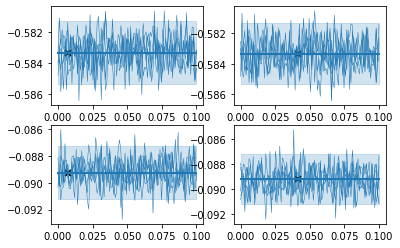

C = [0.00572808 0.09683248]
Epoch 1/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2818 - val_loss: 0.2519
Epoch 2/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2559 - val_loss: 0.2697
Epoch 3/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2537 - val_loss: 0.2561
Epoch 4/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2539 - val_loss: 0.2478
Epoch 5/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2541 - val_loss: 0.2488
Epoch 6/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2548 - val_loss: 0.2475
Predicted: (array([0.], dtype=float32), array([13319]))


/home/mtm/MOOEasyTool/venvMOO/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Iteration= 0  x_best= [0.00572808 0.09683248] y= (-0.0, -0.0)


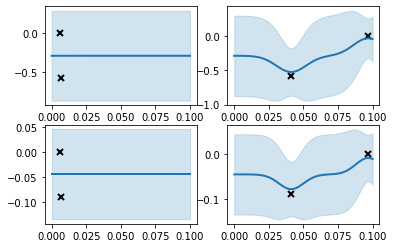

C = [0.00491977 0.02624621]
Epoch 1/6
2359/2359 [==============================] - 6s 3ms/step - loss: 0.2625 - val_loss: 0.2540
Epoch 2/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2479 - val_loss: 0.2425
Epoch 3/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2452 - val_loss: 0.2413
Epoch 4/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2435 - val_loss: 0.2425
Epoch 5/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2432 - val_loss: 0.2388
Epoch 6/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2419 - val_loss: 0.2397
Predicted: (array([0., 1.], dtype=float32), array([13209,   110]))
Iteration= 1  x_best= [0.00491977 0.02624621] y= (-0.6363636363636364, -0.055776892430278883)


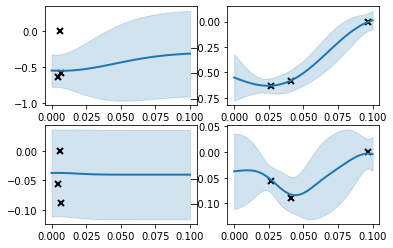

C = [0.05767974 0.02015478]
Epoch 1/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2625 - val_loss: 0.2473
Epoch 2/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2501 - val_loss: 0.2457
Epoch 3/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2472 - val_loss: 0.2513
Epoch 4/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2463 - val_loss: 0.2422
Epoch 5/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2442 - val_loss: 0.2454
Epoch 6/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2439 - val_loss: 0.2431
Predicted: (array([0., 1.], dtype=float32), array([13272,    47]))
Iteration= 2  x_best= [0.05767974 0.02015478] y= (-0.6808510638297872, -0.02549800796812749)


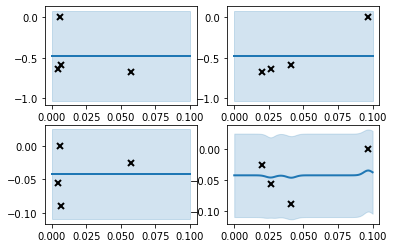

C = [0.0065679  0.03777555]
Epoch 1/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2642 - val_loss: 0.2494
Epoch 2/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2484 - val_loss: 0.2464
Epoch 3/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2460 - val_loss: 0.2410
Epoch 4/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2442 - val_loss: 0.2439
Epoch 5/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2425 - val_loss: 0.2393
Epoch 6/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2417 - val_loss: 0.2407
Predicted: (array([0., 1.], dtype=float32), array([13254,    65]))
Iteration= 3  x_best= [0.0065679  0.03777555] y= (-0.6923076923076923, -0.035856573705179286)


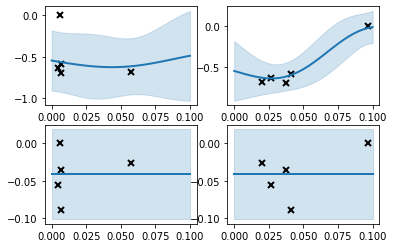

C = [0.1        0.05833555]
Epoch 1/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2675 - val_loss: 0.2666
Epoch 2/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2528 - val_loss: 0.2508
Epoch 3/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2492 - val_loss: 0.2472
Epoch 4/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2484 - val_loss: 0.2477
Epoch 5/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2492 - val_loss: 0.2428
Epoch 6/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2469 - val_loss: 0.2413
Predicted: (array([0., 1.], dtype=float32), array([13299,    20]))
Iteration= 4  x_best= [0.1        0.05833555] y= (-0.8, -0.012749003984063745)


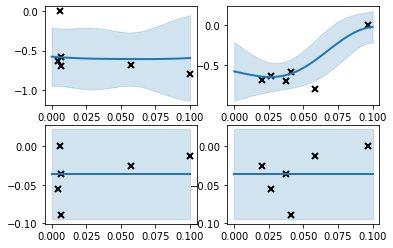

C = [0.1 0.1]
Epoch 1/6
2359/2359 [==============================] - 6s 3ms/step - loss: 0.2731 - val_loss: 0.2524
Epoch 2/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2554 - val_loss: 0.2446
Epoch 3/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2497 - val_loss: 0.2493
Epoch 4/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2491 - val_loss: 0.2440
Epoch 5/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2468 - val_loss: 0.2415
Epoch 6/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2458 - val_loss: 0.2404
Predicted: (array([0., 1.], dtype=float32), array([13271,    48]))
Iteration= 5  x_best= [0.1 0.1] y= (-0.6666666666666666, -0.02549800796812749)


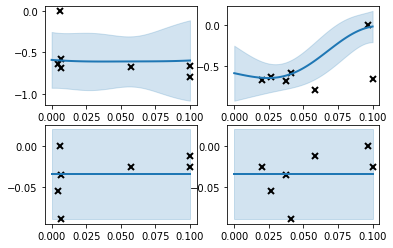

C = [1.00000000e-01 4.23292398e-16]
Epoch 1/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.4276 - val_loss: 0.4254
Epoch 2/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.4276 - val_loss: 0.4254
Epoch 3/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.4279 - val_loss: 0.4254
Epoch 4/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.4273 - val_loss: 0.4254
Epoch 5/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.4273 - val_loss: 0.4254
Epoch 6/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.4277 - val_loss: 0.4254
Predicted: (array([0.], dtype=float32), array([13319]))


/home/mtm/MOOEasyTool/venvMOO/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Iteration= 6  x_best= [1.00000000e-01 4.23292398e-16] y= (-0.0, -0.0)


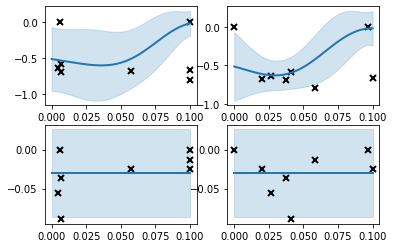

C = [0.06448103 0.06308276]
Epoch 1/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2692 - val_loss: 0.2478
Epoch 2/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2526 - val_loss: 0.2475
Epoch 3/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2487 - val_loss: 0.2408
Epoch 4/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2461 - val_loss: 0.2438
Epoch 5/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2450 - val_loss: 0.2419
Epoch 6/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2436 - val_loss: 0.2441
Predicted: (array([0., 1.], dtype=float32), array([13310,     9]))
Iteration= 7  x_best= [0.06448103 0.06308276] y= (-0.7777777777777778, -0.005577689243027889)


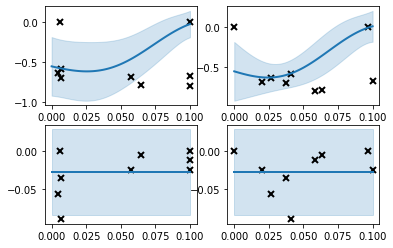

C = [0.0245659 0.       ]
Epoch 1/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.5443 - val_loss: 0.5396
Epoch 2/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.5444 - val_loss: 0.5396
Epoch 3/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.5441 - val_loss: 0.5396
Epoch 4/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.5442 - val_loss: 0.5396
Epoch 5/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.5438 - val_loss: 0.5396
Epoch 6/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.5446 - val_loss: 0.5396
Predicted: (array([0., 1.], dtype=float32), array([12770,   549]))
Iteration= 8  x_best= [0.0245659 0.       ] y= (-0.2604735883424408, -0.11394422310756971)


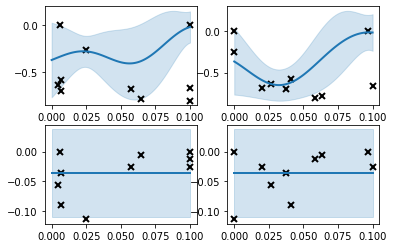

C = [0.06483563 0.1       ]
Epoch 1/6
2359/2359 [==============================] - 6s 3ms/step - loss: 0.2748 - val_loss: 0.2577
Epoch 2/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2563 - val_loss: 0.2562
Epoch 3/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2545 - val_loss: 0.2498
Epoch 4/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2550 - val_loss: 0.2545
Epoch 5/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2531 - val_loss: 0.2506
Epoch 6/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2519 - val_loss: 0.2509
Predicted: (array([0.], dtype=float32), array([13319]))


/home/mtm/MOOEasyTool/venvMOO/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Iteration= 9  x_best= [0.06483563 0.1       ] y= (-0.0, -0.0)


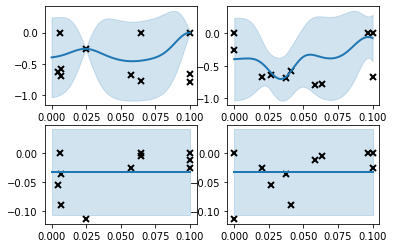

C = [0.08270269 0.06062525]
Epoch 1/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2685 - val_loss: 0.2495
Epoch 2/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2529 - val_loss: 0.2521
Epoch 3/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2496 - val_loss: 0.2446
Epoch 4/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2474 - val_loss: 0.2462
Epoch 5/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2472 - val_loss: 0.2408
Epoch 6/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2454 - val_loss: 0.2534
Predicted: (array([0., 1.], dtype=float32), array([13316,     3]))
Iteration= 10  x_best= [0.08270269 0.06062525] y= (-0.6666666666666666, -0.0015936254980079682)


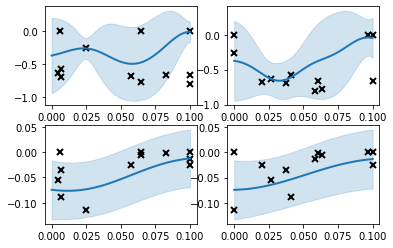

C = [0. 0.]
Epoch 1/6
2359/2359 [==============================] - 5s 2ms/step - loss: 0.7152 - val_loss: 0.7158
Epoch 2/6
2359/2359 [==============================] - 5s 2ms/step - loss: 0.7152 - val_loss: 0.7158
Epoch 3/6
2359/2359 [==============================] - 5s 2ms/step - loss: 0.7152 - val_loss: 0.7158
Epoch 4/6
2359/2359 [==============================] - 5s 2ms/step - loss: 0.7152 - val_loss: 0.7158
Epoch 5/6
2359/2359 [==============================] - 5s 2ms/step - loss: 0.7152 - val_loss: 0.7158
Epoch 6/6
2359/2359 [==============================] - 5s 2ms/step - loss: 0.7152 - val_loss: 0.7158
Predicted: (array([0., 1.], dtype=float32), array([3942, 9377]))
Iteration= 11  x_best= [0. 0.] y= (-0.08318225445238349, -0.6215139442231076)


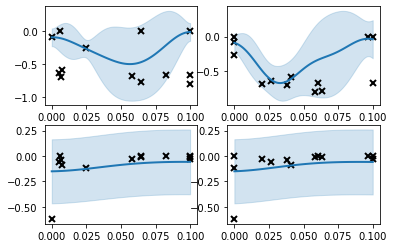

C = [0.03107156 0.02999855]
Epoch 1/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2644 - val_loss: 0.2549
Epoch 2/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2504 - val_loss: 0.2455
Epoch 3/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2463 - val_loss: 0.2482
Epoch 4/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2451 - val_loss: 0.2441
Epoch 5/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2440 - val_loss: 0.2388
Epoch 6/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2425 - val_loss: 0.2445
Predicted: (array([0., 1.], dtype=float32), array([13315,     4]))
Iteration= 12  x_best= [0.03107156 0.02999855] y= (-0.75, -0.002390438247011952)


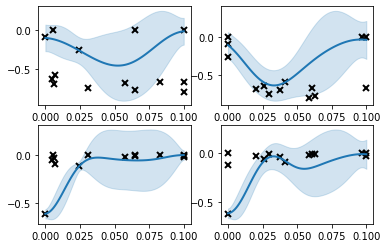

C = [0.03648792 0.05876835]
Epoch 1/6
2359/2359 [==============================] - 6s 3ms/step - loss: 0.2657 - val_loss: 0.2478
Epoch 2/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2498 - val_loss: 0.2457
Epoch 3/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2460 - val_loss: 0.2468
Epoch 4/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2443 - val_loss: 0.2398
Epoch 5/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2441 - val_loss: 0.2400
Epoch 6/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2435 - val_loss: 0.2369
Predicted: (array([0., 1.], dtype=float32), array([13119,   200]))
Iteration= 13  x_best= [0.03648792 0.05876835] y= (-0.565, -0.0900398406374502)


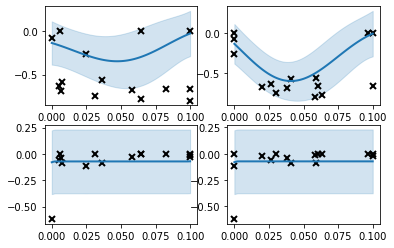

C = [0.06607976 0.03971373]
Epoch 1/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2653 - val_loss: 0.2508
Epoch 2/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2514 - val_loss: 0.2457
Epoch 3/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2483 - val_loss: 0.2449
Epoch 4/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2469 - val_loss: 0.2455
Epoch 5/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2448 - val_loss: 0.2394
Epoch 6/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2430 - val_loss: 0.2438
Predicted: (array([0., 1.], dtype=float32), array([13263,    56]))
Iteration= 14  x_best= [0.06607976 0.03971373] y= (-0.6964285714285714, -0.031075697211155377)


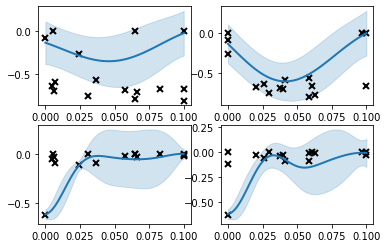

C = [5.62082412e-12 6.28793008e-02]
Epoch 1/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2653 - val_loss: 0.2540
Epoch 2/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2487 - val_loss: 0.2440
Epoch 3/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2439 - val_loss: 0.2546
Epoch 4/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2424 - val_loss: 0.2389
Epoch 5/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2421 - val_loss: 0.2399
Epoch 6/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2415 - val_loss: 0.2389
Predicted: (array([0., 1.], dtype=float32), array([13002,   317]))
Iteration= 15  x_best= [5.62082412e-12 6.28793008e-02] y= (-0.5425867507886435, -0.13705179282868526)


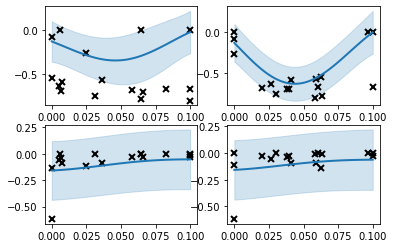

C = [0.1        0.07525095]
Epoch 1/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2717 - val_loss: 0.2504
Epoch 2/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2538 - val_loss: 0.2483
Epoch 3/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2509 - val_loss: 0.2506
Epoch 4/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2504 - val_loss: 0.2443
Epoch 5/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2480 - val_loss: 0.2469
Epoch 6/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2499 - val_loss: 0.2416
Predicted: (array([0., 1.], dtype=float32), array([13288,    31]))
Iteration= 16  x_best= [0.1        0.07525095] y= (-0.7419354838709677, -0.018326693227091632)


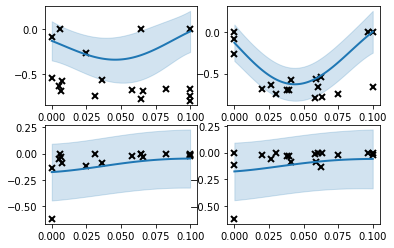

C = [0.1        0.04123035]
Epoch 1/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2659 - val_loss: 0.2474
Epoch 2/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2512 - val_loss: 0.2474
Epoch 3/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2500 - val_loss: 0.2492
Epoch 4/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2466 - val_loss: 0.2406
Epoch 5/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2461 - val_loss: 0.2407
Epoch 6/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2444 - val_loss: 0.2435
Predicted: (array([0., 1.], dtype=float32), array([13284,    35]))
Iteration= 17  x_best= [0.1        0.04123035] y= (-0.7142857142857143, -0.0199203187250996)


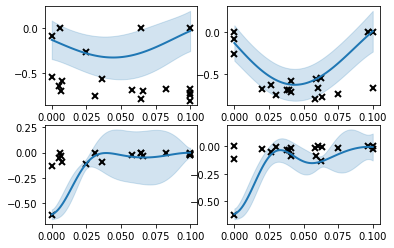

C = [0.04694794 0.04238322]
Epoch 1/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2676 - val_loss: 0.2478
Epoch 2/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2506 - val_loss: 0.2441
Epoch 3/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2465 - val_loss: 0.2400
Epoch 4/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2451 - val_loss: 0.2395
Epoch 5/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2434 - val_loss: 0.2418
Epoch 6/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2425 - val_loss: 0.2403
Predicted: (array([0., 1.], dtype=float32), array([13281,    38]))
Iteration= 18  x_best= [0.04694794 0.04238322] y= (-0.7105263157894737, -0.02151394422310757)


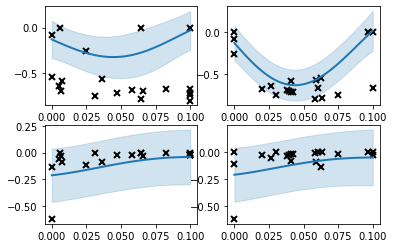

C = [0.1        0.07005284]
Epoch 1/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2701 - val_loss: 0.2542
Epoch 2/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2541 - val_loss: 0.2470
Epoch 3/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2516 - val_loss: 0.2465
Epoch 4/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2514 - val_loss: 0.2468
Epoch 5/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2485 - val_loss: 0.2408
Epoch 6/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2488 - val_loss: 0.2427
Predicted: (array([0., 1.], dtype=float32), array([13221,    98]))
Iteration= 19  x_best= [0.1        0.07005284] y= (-0.6632653061224489, -0.05179282868525897)


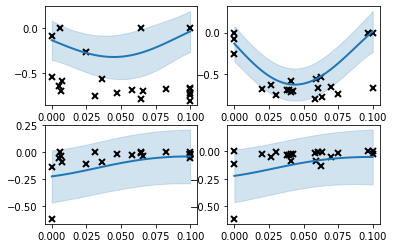

C = [0.07192966 0.03893608]
Epoch 1/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2663 - val_loss: 0.2547
Epoch 2/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2511 - val_loss: 0.2495
Epoch 3/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2479 - val_loss: 0.2427
Epoch 4/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2459 - val_loss: 0.2421
Epoch 5/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2432 - val_loss: 0.2430
Epoch 6/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2426 - val_loss: 0.2426
Predicted: (array([0., 1.], dtype=float32), array([13299,    20]))
Iteration= 20  x_best= [0.07192966 0.03893608] y= (-0.75, -0.01195219123505976)


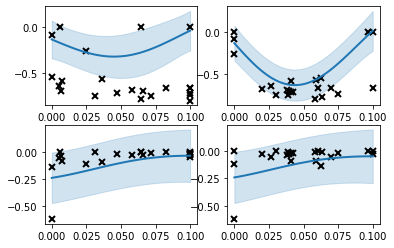

C = [0.1        0.05381949]
Epoch 1/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2678 - val_loss: 0.2518
Epoch 2/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2525 - val_loss: 0.2455
Epoch 3/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2491 - val_loss: 0.2446
Epoch 4/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2480 - val_loss: 0.2406
Epoch 5/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2462 - val_loss: 0.2437
Epoch 6/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2474 - val_loss: 0.2471
Predicted: (array([0., 1.], dtype=float32), array([13311,     8]))
Iteration= 21  x_best= [0.1        0.05381949] y= (-0.875, -0.005577689243027889)


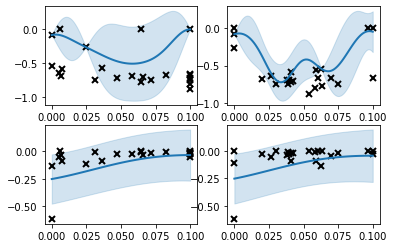

C = [0.0493731 0.       ]
Epoch 1/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.7351 - val_loss: 0.7277
Epoch 2/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.7347 - val_loss: 0.7277
Epoch 3/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.7343 - val_loss: 0.7277
Epoch 4/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.7350 - val_loss: 0.7277
Epoch 5/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.7346 - val_loss: 0.7277
Epoch 6/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.7348 - val_loss: 0.7277
Predicted: (array([0., 1.], dtype=float32), array([6703, 6616]))
Iteration= 22  x_best= [0.0493731 0.       ] y= (-0.10550181378476421, -0.5561752988047809)


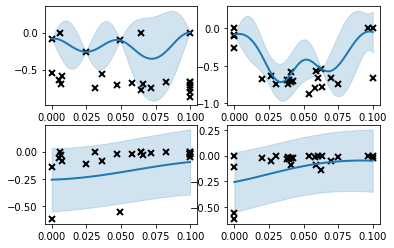

C = [7.26860646e-02 4.02303085e-13]
Epoch 1/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.8100 - val_loss: 0.8433
Epoch 2/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.8110 - val_loss: 0.8433
Epoch 3/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.8114 - val_loss: 0.8433
Epoch 4/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.8100 - val_loss: 0.8433
Epoch 5/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.8107 - val_loss: 0.8433
Epoch 6/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.8097 - val_loss: 0.8433
Predicted: (array([0., 1.], dtype=float32), array([ 1558, 11761]))
Iteration= 23  x_best= [7.26860646e-02 4.02303085e-13] y= (-0.08222089958336876, -0.7705179282868526)


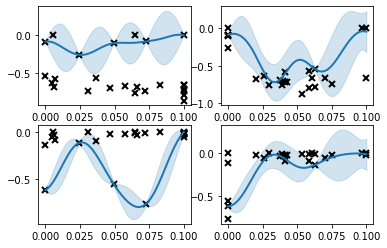

C = [0.03586549 0.08736421]
Epoch 1/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2884 - val_loss: 0.2461
Epoch 2/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2537 - val_loss: 0.2494
Epoch 3/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2492 - val_loss: 0.2485
Epoch 4/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2470 - val_loss: 0.2401
Epoch 5/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2448 - val_loss: 0.2430
Epoch 6/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2457 - val_loss: 0.2387
Predicted: (array([0., 1.], dtype=float32), array([13171,   148]))
Iteration= 24  x_best= [0.03586549 0.08736421] y= (-0.6013513513513513, -0.07091633466135458)


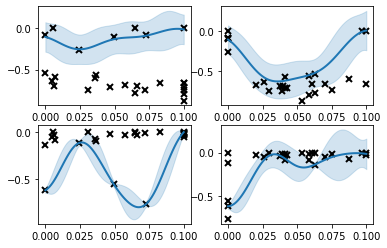

C = [0.01882843 0.07196888]
Epoch 1/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2669 - val_loss: 0.2611
Epoch 2/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2506 - val_loss: 0.2486
Epoch 3/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2474 - val_loss: 0.2518
Epoch 4/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2441 - val_loss: 0.2417
Epoch 5/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2434 - val_loss: 0.2405
Epoch 6/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2436 - val_loss: 0.2389
Predicted: (array([0., 1.], dtype=float32), array([13226,    93]))
Iteration= 25  x_best= [0.01882843 0.07196888] y= (-0.6559139784946236, -0.04860557768924303)


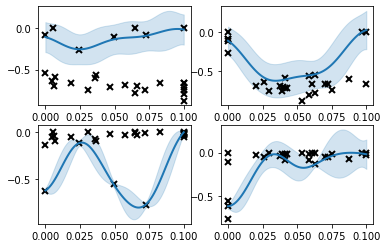

C = [0.08242092 0.01701632]
Epoch 1/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2630 - val_loss: 0.2534
Epoch 2/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2504 - val_loss: 0.2438
Epoch 3/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2471 - val_loss: 0.2458
Epoch 4/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2461 - val_loss: 0.2430
Epoch 5/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2448 - val_loss: 0.2414
Epoch 6/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2432 - val_loss: 0.2409
Predicted: (array([0., 1.], dtype=float32), array([13177,   142]))
Iteration= 26  x_best= [0.08242092 0.01701632] y= (-0.6408450704225352, -0.07250996015936255)


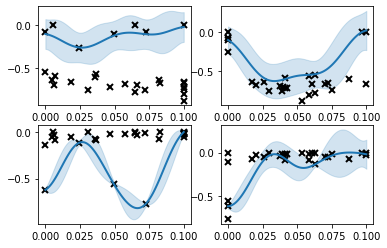

C = [0.07889681 0.08189729]
Epoch 1/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2757 - val_loss: 0.2507
Epoch 2/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2556 - val_loss: 0.2519
Epoch 3/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2532 - val_loss: 0.2533
Epoch 4/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2535 - val_loss: 0.2505
Epoch 5/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2537 - val_loss: 0.2494
Epoch 6/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2525 - val_loss: 0.2489
Predicted: (array([0.], dtype=float32), array([13319]))


/home/mtm/MOOEasyTool/venvMOO/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Iteration= 27  x_best= [0.07889681 0.08189729] y= (-0.0, -0.0)


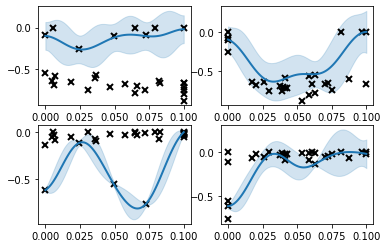

C = [0.02927982 0.1       ]
Epoch 1/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2743 - val_loss: 0.2468
Epoch 2/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2512 - val_loss: 0.2578
Epoch 3/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2499 - val_loss: 0.2631
Epoch 4/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2525 - val_loss: 0.2428
Epoch 5/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2454 - val_loss: 0.2401
Epoch 6/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2445 - val_loss: 0.2409
Predicted: (array([0., 1.], dtype=float32), array([13295,    24]))
Iteration= 28  x_best= [0.02927982 0.1       ] y= (-0.7916666666666666, -0.015139442231075698)


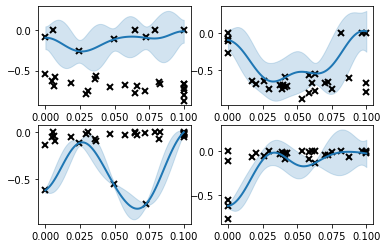

C = [0.06262799 0.00348371]
Epoch 1/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2670 - val_loss: 0.2495
Epoch 2/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2510 - val_loss: 0.2473
Epoch 3/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2475 - val_loss: 0.2456
Epoch 4/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2451 - val_loss: 0.2453
Epoch 5/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2440 - val_loss: 0.2464
Epoch 6/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2429 - val_loss: 0.2444
Predicted: (array([0., 1.], dtype=float32), array([13234,    85]))
Iteration= 29  x_best= [0.06262799 0.00348371] y= (-0.6235294117647059, -0.04223107569721116)


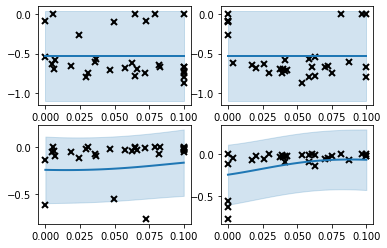

C = [0. 0.]
Epoch 1/6
2359/2359 [==============================] - 5s 2ms/step - loss: 0.5136 - val_loss: 0.5142
Epoch 2/6
2359/2359 [==============================] - 5s 2ms/step - loss: 0.5136 - val_loss: 0.5142
Epoch 3/6
2359/2359 [==============================] - 5s 2ms/step - loss: 0.5136 - val_loss: 0.5142
Epoch 4/6
2359/2359 [==============================] - 5s 2ms/step - loss: 0.5136 - val_loss: 0.5142
Epoch 5/6
2359/2359 [==============================] - 5s 2ms/step - loss: 0.5136 - val_loss: 0.5142
Epoch 6/6
2359/2359 [==============================] - 5s 2ms/step - loss: 0.5136 - val_loss: 0.5142
Predicted: (array([0., 1.], dtype=float32), array([13314,     5]))
Iteration= 30  x_best= [0. 0.] y= (-0.2, -0.0007968127490039841)


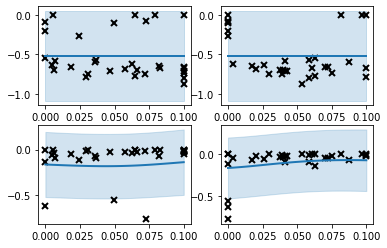

C = [0.04321039 0.        ]
Epoch 1/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.5640 - val_loss: 0.5563
Epoch 2/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.5643 - val_loss: 0.5563
Epoch 3/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.5644 - val_loss: 0.5563
Epoch 4/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.5643 - val_loss: 0.5563
Epoch 5/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.5653 - val_loss: 0.5563
Epoch 6/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.5641 - val_loss: 0.5563
Predicted: (array([0., 1.], dtype=float32), array([13315,     4]))
Iteration= 31  x_best= [0.04321039 0.        ] y= (-0.0, -0.0)


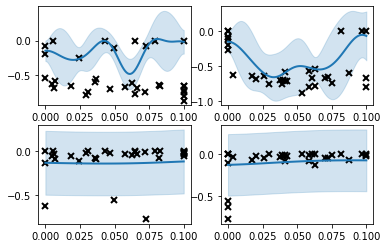

C = [0.07110101 0.02354264]
Epoch 1/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2641 - val_loss: 0.2489
Epoch 2/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2489 - val_loss: 0.2438
Epoch 3/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2471 - val_loss: 0.2540
Epoch 4/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2461 - val_loss: 0.2406
Epoch 5/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2448 - val_loss: 0.2399
Epoch 6/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2436 - val_loss: 0.2414
Predicted: (array([0., 1.], dtype=float32), array([13315,     4]))
Iteration= 32  x_best= [0.07110101 0.02354264] y= (-0.75, -0.002390438247011952)


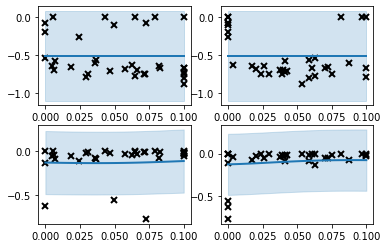

C = [0.0368656 0.       ]
Epoch 1/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.3955 - val_loss: 0.3949
Epoch 2/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.3959 - val_loss: 0.3949
Epoch 3/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.3958 - val_loss: 0.3949
Epoch 4/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.3958 - val_loss: 0.3949
Epoch 5/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.3957 - val_loss: 0.3949
Epoch 6/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.3955 - val_loss: 0.3949
Predicted: (array([0.], dtype=float32), array([13319]))


/home/mtm/MOOEasyTool/venvMOO/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Iteration= 33  x_best= [0.0368656 0.       ] y= (-0.0, -0.0)


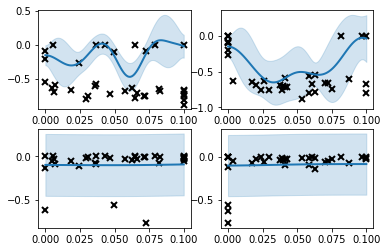

C = [0.08704981 0.04609893]
Epoch 1/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2656 - val_loss: 0.2469
Epoch 2/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2517 - val_loss: 0.2445
Epoch 3/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2486 - val_loss: 0.2485
Epoch 4/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2465 - val_loss: 0.2412
Epoch 5/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2456 - val_loss: 0.2411
Epoch 6/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2451 - val_loss: 0.2474
Predicted: (array([0., 1.], dtype=float32), array([13211,   108]))
Iteration= 34  x_best= [0.08704981 0.04609893] y= (-0.6574074074074074, -0.05657370517928287)


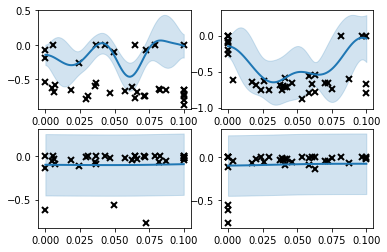

C = [0.02593245 0.04326109]
Epoch 1/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2659 - val_loss: 0.2496
Epoch 2/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2513 - val_loss: 0.2449
Epoch 3/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2466 - val_loss: 0.2413
Epoch 4/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2449 - val_loss: 0.2413
Epoch 5/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2440 - val_loss: 0.2391
Epoch 6/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2433 - val_loss: 0.2377
Predicted: (array([0., 1.], dtype=float32), array([13282,    37]))
Iteration= 35  x_best= [0.02593245 0.04326109] y= (-0.7027027027027027, -0.020717131474103586)


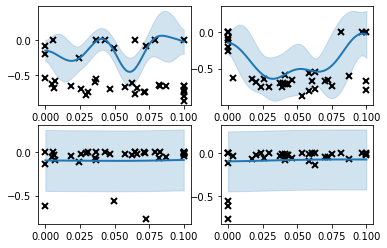

C = [0.01869225 0.02571056]
Epoch 1/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2640 - val_loss: 0.2527
Epoch 2/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2502 - val_loss: 0.2607
Epoch 3/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2470 - val_loss: 0.2419
Epoch 4/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2446 - val_loss: 0.2492
Epoch 5/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2440 - val_loss: 0.2408
Epoch 6/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2424 - val_loss: 0.2435
Predicted: (array([0., 1.], dtype=float32), array([13289,    30]))
Iteration= 36  x_best= [0.01869225 0.02571056] y= (-0.7666666666666667, -0.018326693227091632)


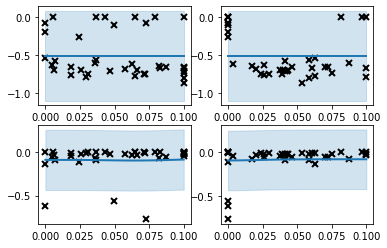

C = [6.42233624e-02 3.47847245e-11]
Epoch 1/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.7695 - val_loss: 0.7381
Epoch 2/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.7683 - val_loss: 0.7381
Epoch 3/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.7682 - val_loss: 0.7381
Epoch 4/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.7684 - val_loss: 0.7381
Epoch 5/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.7685 - val_loss: 0.7381
Epoch 6/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.7690 - val_loss: 0.7381
Predicted: (array([0., 1.], dtype=float32), array([4462, 8857]))
Iteration= 37  x_best= [6.42233624e-02 3.47847245e-11] y= (-0.06853336344134583, -0.48366533864541833)


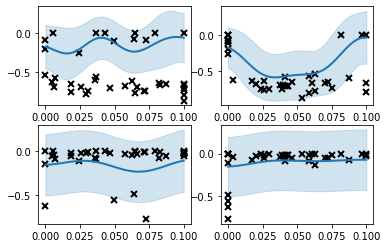

C = [0.05741794 0.05521096]
Epoch 1/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2670 - val_loss: 0.2492
Epoch 2/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2504 - val_loss: 0.2476
Epoch 3/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2481 - val_loss: 0.2470
Epoch 4/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2471 - val_loss: 0.2419
Epoch 5/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2438 - val_loss: 0.2442
Epoch 6/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2431 - val_loss: 0.2407
Predicted: (array([0., 1.], dtype=float32), array([13244,    75]))
Iteration= 38  x_best= [0.05741794 0.05521096] y= (-0.7066666666666667, -0.04223107569721116)


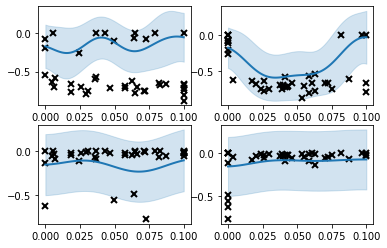

C = [0.06724188 0.01904301]
Epoch 1/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2628 - val_loss: 0.2587
Epoch 2/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2504 - val_loss: 0.2457
Epoch 3/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2470 - val_loss: 0.2411
Epoch 4/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2444 - val_loss: 0.2464
Epoch 5/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2445 - val_loss: 0.2448
Epoch 6/6
2359/2359 [==============================] - 6s 2ms/step - loss: 0.2439 - val_loss: 0.2415
Predicted: (array([0., 1.], dtype=float32), array([13197,   122]))
Iteration= 39  x_best= [0.06724188 0.01904301] y= (-0.6639344262295082, -0.06454183266932272)


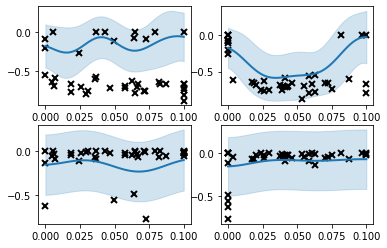

In [12]:
savename = "MOONNHeart"

### GPs Initialization
GP = GaussianProcess(O, C, d, lowerBounds, upperBounds, noise_variance=2e-6)

#### Initial samples, at least 1
for l in range(initial_iter):
    ## Get random evaluation point
    while True:
        x_rand = np.random.uniform(lowerBounds[0], upperBounds[0], d)
        if GP.X is None or not x_rand in GP.X:
            break
    ## EVALUATION OF THE OUTSIDE FUNCTION
    y_rand = evaluation(x_rand)
    GP.addSample(x_rand,y_rand)

GP.updateGP()
GP.optimizeKernel()
GP.plotSamples()

for l in range(total_iter):

    ## For all acq functions but usemo
    x_best, acq_best = mes_acq(GP)
    ## For usemo
    # x_best, acq_best = usemo_acq(GP, function = "ei", showplots = False)

    ## EVALUATION OF THE OUTSIDE FUNCTION
    y_best = evaluation(x_best)

    ## UPDATE
    GP.addSample(x_best,y_best)     ## Add new sample to the model
    GP.updateGP()                   ## Update data on the GP regressor
    GP.optimizeKernel()             ## Optimize kernel hyperparameters

    print("Iteration=", l, " x_best=", x_best, "y=", y_best)
    GP.plot()
    

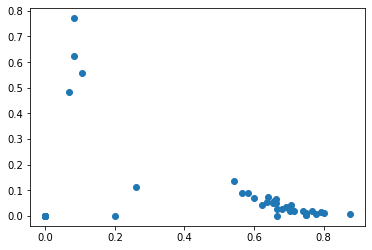

In [13]:
plt.scatter(-GP.Y[:,0],-GP.Y[:,1])

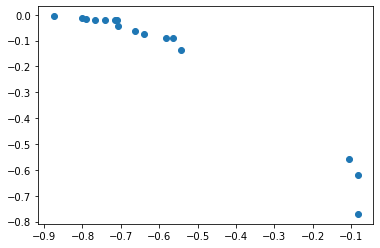

In [15]:
from utils.calc_pareto import get_pareto_undominated_by

front = get_pareto_undominated_by(GP.Y)

plt.scatter(front[:,0],front[:,1])

In [6]:
savename = "MOONNHeart"

### GPs Initialization
GP_p = GaussianProcess(O, C, d, lowerBounds, upperBounds, noise_variance=2e-6)

#### Initial samples, at least 1
for l in range(initial_iter):
    ## Get random evaluation point
    while True:
        x_rand = np.random.uniform(lowerBounds[0], upperBounds[0], d)
        if GP_p.X is None or not x_rand in GP.X:
            break
    ## EVALUATION OF THE OUTSIDE FUNCTION
    y_rand = evaluation_precision(x_rand)
    GP_p.addSample(x_rand,y_rand)

GP_p.updateGP()
GP_p.optimizeKernel()
#GP.plotSamples()

for l in range(total_iter):

    ## For all acq functions but usemo
    x_best, acq_best = mes_acq(GP_p)
    ## For usemo
    # x_best, acq_best = usemo_acq(GP, function = "ei", showplots = False)

    ## EVALUATION OF THE OUTSIDE FUNCTION
    y_best = evaluation_precision(x_best)

    ## UPDATE
    GP_p.addSample(x_best,y_best)     ## Add new sample to the model
    GP_p.updateGP()                   ## Update data on the GP regressor
    GP_p.optimizeKernel()             ## Optimize kernel hyperparameters

    print("Iteration=", l, " x_best=", x_best, "y=", y_best)
    #GP.plot()
    

C = [0.00771321 0.00020752]
Epoch 1/6


2023-01-30 15:28:39.459269: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


472/472 [==============================] - 2s 3ms/step - loss: 0.3375 - val_loss: 0.2917
Epoch 2/6
472/472 [==============================] - 1s 2ms/step - loss: 0.2768 - val_loss: 0.2776
Epoch 3/6
472/472 [==============================] - 1s 2ms/step - loss: 0.2695 - val_loss: 0.2774
Epoch 4/6
472/472 [==============================] - 1s 3ms/step - loss: 0.2631 - val_loss: 0.2698
Epoch 5/6
472/472 [==============================] - 1s 2ms/step - loss: 0.2611 - val_loss: 0.2779
Epoch 6/6
472/472 [==============================] - 1s 2ms/step - loss: 0.2576 - val_loss: 0.2703
Predicted: (array([0., 1.], dtype=float32), array([7491,  120]))


2023-01-30 15:28:47.128106: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


C = [0.00967343 0.00364869]
Epoch 1/6
472/472 [==============================] - 1s 3ms/step - loss: 0.2822 - val_loss: 0.2631
Epoch 2/6
472/472 [==============================] - 1s 3ms/step - loss: 0.2605 - val_loss: 0.2694
Epoch 3/6
472/472 [==============================] - 1s 2ms/step - loss: 0.2571 - val_loss: 0.2771
Epoch 4/6
472/472 [==============================] - 1s 2ms/step - loss: 0.2541 - val_loss: 0.2558
Epoch 5/6
472/472 [==============================] - 1s 2ms/step - loss: 0.2526 - val_loss: 0.2637
Epoch 6/6
472/472 [==============================] - 1s 2ms/step - loss: 0.2495 - val_loss: 0.2605
Predicted: (array([0., 1.], dtype=float32), array([7567,   44]))
Iteration= 0  x_best= [0.00967343 0.00364869] y= [-0.5909090909090909, -0.5909090909090909]
C = [0.00999958 0.00467635]
Epoch 1/6
472/472 [==============================] - 1s 3ms/step - loss: 0.2874 - val_loss: 0.2678
Epoch 2/6
472/472 [==============================] - 1s 2ms/step - loss: 0.2619 - val_loss: 0.

/home/mtm/MOOEasyTool/venvMOO/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Iteration= 4  x_best= [0.00999998 0.00999999] y= [-0.0, -0.0]
C = [0.00999294 0.00999978]
Epoch 1/6
472/472 [==============================] - 1s 3ms/step - loss: 0.2874 - val_loss: 0.2640
Epoch 2/6
472/472 [==============================] - 1s 3ms/step - loss: 0.2595 - val_loss: 0.2630
Epoch 3/6
472/472 [==============================] - 1s 2ms/step - loss: 0.2551 - val_loss: 0.2837
Epoch 4/6
472/472 [==============================] - 1s 2ms/step - loss: 0.2518 - val_loss: 0.2581
Epoch 5/6
472/472 [==============================] - 1s 2ms/step - loss: 0.2513 - val_loss: 0.2568
Epoch 6/6
472/472 [==============================] - 1s 2ms/step - loss: 0.2507 - val_loss: 0.2545
Predicted: (array([0.], dtype=float32), array([7611]))


/home/mtm/MOOEasyTool/venvMOO/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Iteration= 5  x_best= [0.00999294 0.00999978] y= [-0.0, -0.0]
C = [2.88940846e-09 3.78047352e-08]
Epoch 1/6
472/472 [==============================] - 1s 3ms/step - loss: 1.6372 - val_loss: 1.6279
Epoch 2/6
472/472 [==============================] - 1s 2ms/step - loss: 1.6262 - val_loss: 1.6168
Epoch 3/6
472/472 [==============================] - 1s 2ms/step - loss: 1.6152 - val_loss: 1.6059
Epoch 4/6
472/472 [==============================] - 1s 2ms/step - loss: 1.6041 - val_loss: 1.5949
Epoch 5/6
472/472 [==============================] - 1s 2ms/step - loss: 1.5933 - val_loss: 1.5841
Epoch 6/6
472/472 [==============================] - 1s 3ms/step - loss: 1.5824 - val_loss: 1.5733
Predicted: (array([1.], dtype=float32), array([7611]))
Iteration= 6  x_best= [2.88940846e-09 3.78047352e-08] y= [-0.09420575482853764, -0.09420575482853764]
C = [0.01       0.00999999]
Epoch 1/6
472/472 [==============================] - 1s 3ms/step - loss: 0.2909 - val_loss: 0.2799
Epoch 2/6
472/472 [=====

/home/mtm/MOOEasyTool/venvMOO/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Iteration= 7  x_best= [0.01       0.00999999] y= [-0.0, -0.0]
C = [9.99079007e-03 2.73459935e-06]
Epoch 1/6
472/472 [==============================] - 1s 3ms/step - loss: 0.8484 - val_loss: 0.6468
Epoch 2/6
472/472 [==============================] - 1s 3ms/step - loss: 0.5362 - val_loss: 0.4519
Epoch 3/6
472/472 [==============================] - 1s 2ms/step - loss: 0.4080 - val_loss: 0.3758
Epoch 4/6
472/472 [==============================] - 1s 2ms/step - loss: 0.3572 - val_loss: 0.3455
Epoch 5/6
472/472 [==============================] - 1s 2ms/step - loss: 0.3361 - val_loss: 0.3326
Epoch 6/6
472/472 [==============================] - 1s 2ms/step - loss: 0.3267 - val_loss: 0.3262
Predicted: (array([0.], dtype=float32), array([7611]))


/home/mtm/MOOEasyTool/venvMOO/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Iteration= 8  x_best= [9.99079007e-03 2.73459935e-06] y= [-0.0, -0.0]
C = [0.00999994 0.00999998]
Epoch 1/6
472/472 [==============================] - 1s 3ms/step - loss: 0.2980 - val_loss: 0.2668
Epoch 2/6
472/472 [==============================] - 1s 2ms/step - loss: 0.2623 - val_loss: 0.2658
Epoch 3/6
472/472 [==============================] - 1s 2ms/step - loss: 0.2582 - val_loss: 0.2608
Epoch 4/6
472/472 [==============================] - 1s 3ms/step - loss: 0.2540 - val_loss: 0.2548
Epoch 5/6
472/472 [==============================] - 1s 2ms/step - loss: 0.2500 - val_loss: 0.2553
Epoch 6/6
472/472 [==============================] - 1s 3ms/step - loss: 0.2502 - val_loss: 0.2826
Predicted: (array([0., 1.], dtype=float32), array([7602,    9]))
Iteration= 9  x_best= [0.00999994 0.00999998] y= [-0.7777777777777778, -0.7777777777777778]
C = [0.01 0.01]
Epoch 1/6
472/472 [==============================] - 1s 3ms/step - loss: 0.2837 - val_loss: 0.2884
Epoch 2/6
472/472 [=================

/home/mtm/MOOEasyTool/venvMOO/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Iteration= 19  x_best= [0.00999953 0.01      ] y= [-0.0, -0.0]
C = [0.00999981 0.00999977]
Epoch 1/6
472/472 [==============================] - 1s 3ms/step - loss: 0.2893 - val_loss: 0.2643
Epoch 2/6
472/472 [==============================] - 1s 2ms/step - loss: 0.2621 - val_loss: 0.2660
Epoch 3/6
472/472 [==============================] - 1s 3ms/step - loss: 0.2544 - val_loss: 0.2683
Epoch 4/6
472/472 [==============================] - 1s 2ms/step - loss: 0.2516 - val_loss: 0.2867
Epoch 5/6
472/472 [==============================] - 1s 3ms/step - loss: 0.2514 - val_loss: 0.2560
Epoch 6/6
472/472 [==============================] - 1s 2ms/step - loss: 0.2500 - val_loss: 0.2554
Predicted: (array([0., 1.], dtype=float32), array([7401,  210]))
Iteration= 20  x_best= [0.00999981 0.00999977] y= [-0.5238095238095238, -0.5238095238095238]
C = [0.01 0.01]
Epoch 1/6
472/472 [==============================] - 1s 3ms/step - loss: 0.2896 - val_loss: 0.2767
Epoch 2/6
472/472 [=======================

Epoch 6/6
472/472 [==============================] - 1s 3ms/step - loss: 0.2498 - val_loss: 0.2589
Predicted: (array([0., 1.], dtype=float32), array([7609,    2]))
Iteration= 30  x_best= [0.01 0.01] y= [-0.5, -0.5]
C = [0.00999997 0.00999997]
Epoch 1/6
472/472 [==============================] - 1s 3ms/step - loss: 0.2832 - val_loss: 0.2632
Epoch 2/6
472/472 [==============================] - 1s 3ms/step - loss: 0.2619 - val_loss: 0.2617
Epoch 3/6
472/472 [==============================] - 1s 2ms/step - loss: 0.2563 - val_loss: 0.2559
Epoch 4/6
472/472 [==============================] - 1s 2ms/step - loss: 0.2520 - val_loss: 0.2647
Epoch 5/6
472/472 [==============================] - 1s 3ms/step - loss: 0.2506 - val_loss: 0.2601
Epoch 6/6
472/472 [==============================] - 1s 2ms/step - loss: 0.2490 - val_loss: 0.2540
Predicted: (array([0., 1.], dtype=float32), array([7565,   46]))
Iteration= 31  x_best= [0.00999997 0.00999997] y= [-0.6521739130434783, -0.6521739130434783]
C = [

/home/mtm/MOOEasyTool/venvMOO/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Iteration= 35  x_best= [0.00999999 0.01      ] y= [-0.0, -0.0]
C = [0.00999999 0.01      ]
Epoch 1/6
472/472 [==============================] - 1s 3ms/step - loss: 0.2822 - val_loss: 0.2718
Epoch 2/6
472/472 [==============================] - 1s 2ms/step - loss: 0.2615 - val_loss: 0.2623
Epoch 3/6
472/472 [==============================] - 1s 3ms/step - loss: 0.2576 - val_loss: 0.2563
Epoch 4/6
472/472 [==============================] - 1s 2ms/step - loss: 0.2517 - val_loss: 0.2603
Epoch 5/6
472/472 [==============================] - 1s 3ms/step - loss: 0.2517 - val_loss: 0.2642
Epoch 6/6
472/472 [==============================] - 1s 2ms/step - loss: 0.2507 - val_loss: 0.2552
Predicted: (array([0., 1.], dtype=float32), array([7589,   22]))
Iteration= 36  x_best= [0.00999999 0.01      ] y= [-0.6818181818181818, -0.6818181818181818]
C = [0.0099997  0.00999998]
Epoch 1/6
472/472 [==============================] - 1s 3ms/step - loss: 0.2879 - val_loss: 0.2677
Epoch 2/6
472/472 [===========

In [8]:
savename = "MOONNHeart"

### GPs Initialization
GP_r = GaussianProcess(O, C, d, lowerBounds, upperBounds, noise_variance=2e-6)

#### Initial samples, at least 1
for l in range(initial_iter):
    ## Get random evaluation point
    while True:
        x_rand = np.random.uniform(lowerBounds[0], upperBounds[0], d)
        if GP_r.X is None or not x_rand in GP_r.X:
            break
    ## EVALUATION OF THE OUTSIDE FUNCTION
    y_rand = evaluation_recall(x_rand)
    GP_r.addSample(x_rand,y_rand)

GP_r.updateGP()
GP_r.optimizeKernel()
#GP.plotSamples()

for l in range(total_iter):

    ## For all acq functions but usemo
    x_best, acq_best = mes_acq(GP_r)
    ## For usemo
    # x_best, acq_best = usemo_acq(GP, function = "ei", showplots = False)

    ## EVALUATION OF THE OUTSIDE FUNCTION
    y_best = evaluation_recall(x_best)

    ## UPDATE
    GP_r.addSample(x_best,y_best)     ## Add new sample to the model
    GP_r.updateGP()                   ## Update data on the GP regressor
    GP_r.optimizeKernel()             ## Optimize kernel hyperparameters

    print("Iteration=", l, " x_best=", x_best, "y=", y_best)
    #GP.plot()

C = [0.00817507 0.00752749]
Epoch 1/6
472/472 [==============================] - 1s 3ms/step - loss: 0.2899 - val_loss: 0.2715
Epoch 2/6
472/472 [==============================] - 1s 2ms/step - loss: 0.2587 - val_loss: 0.2674
Epoch 3/6
472/472 [==============================] - 1s 2ms/step - loss: 0.2564 - val_loss: 0.2575
Epoch 4/6
472/472 [==============================] - 1s 3ms/step - loss: 0.2529 - val_loss: 0.2609
Epoch 5/6
472/472 [==============================] - 1s 2ms/step - loss: 0.2519 - val_loss: 0.2556
Epoch 6/6
472/472 [==============================] - 1s 2ms/step - loss: 0.2507 - val_loss: 0.2692
Predicted: (array([0., 1.], dtype=float32), array([7556,   55]))
C = [0.00873443 0.00576841]
Epoch 1/6
472/472 [==============================] - 1s 3ms/step - loss: 0.2833 - val_loss: 0.2763
Epoch 2/6
472/472 [==============================] - 1s 2ms/step - loss: 0.2645 - val_loss: 0.2640
Epoch 3/6
472/472 [==============================] - 1s 3ms/step - loss: 0.2564 - val_l

Epoch 2/6
472/472 [==============================] - 1s 2ms/step - loss: 0.7089 - val_loss: 0.7045
Epoch 3/6
472/472 [==============================] - 1s 3ms/step - loss: 0.6963 - val_loss: 0.6919
Epoch 4/6
472/472 [==============================] - 1s 2ms/step - loss: 0.6849 - val_loss: 0.6796
Epoch 5/6
472/472 [==============================] - 1s 3ms/step - loss: 0.6723 - val_loss: 0.6677
Epoch 6/6
472/472 [==============================] - 1s 2ms/step - loss: 0.6599 - val_loss: 0.6561
Predicted: (array([0., 1.], dtype=float32), array([5543, 2068]))
Iteration= 20  x_best= [9.99995527e-03 1.12898479e-07] y= [-0.20920502092050208, -0.20920502092050208]
C = [9.99998665e-03 1.86919864e-08]
Epoch 1/6
472/472 [==============================] - 1s 3ms/step - loss: 1.0738 - val_loss: 1.0694
Epoch 2/6
472/472 [==============================] - 1s 3ms/step - loss: 1.0713 - val_loss: 1.0671
Epoch 3/6
472/472 [==============================] - 1s 2ms/step - loss: 1.0690 - val_loss: 1.0647
Epoc

## Evaluate results

As you are doing a real world experiment you do not have access to the real pareto front, then you fo noy hsbr yhr metrics as before (I removed them).

What you should evaluate is the results in terms of the best *y* possible. You have the data below, but you may do a pandas dataframe to store it cleaner when it is computed in the previous section.

GP.X === samples where the function was evaluated

GP.Y === results of those evaluations

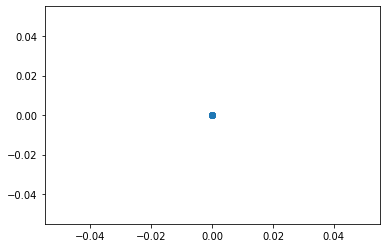

In [15]:
from utils.calc_pareto import get_pareto_undominated_by

front = get_pareto_undominated_by(-GP_p.Y)

plt.scatter(front[:,0],front[:,1])

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score

front_test = []

data = pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")
X = data.drop("HeartDiseaseorAttack", axis=1)
y = data["HeartDiseaseorAttack"]

y_1 = y[y == 1]
y_used = pd.concat([y_1, y[y == 0].sample(len(y_1))])
X_used = X.iloc[y_used.index]

X_train_val, X_test, y_train_val, y_test = train_test_split(X_used, y_used, test_size=0.1, random_state=42, stratify=y_used)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1, random_state=42, stratify=y_train_val)


for arch in GP_p.X:
    print(arch)
    model = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(21, 1)),
      tf.keras.layers.Dense(500, activation='relu'),
      tf.keras.layers.Dropout(arch[0]),
      tf.keras.layers.Dense(500, activation='relu'),
      tf.keras.layers.Dense(500, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    checkpoint_path = f"./Checkpoints/model__dropout_precision{arch[0]}_{arch[1]}"
    checkpoint_dir = os.path.dirname(checkpoint_path)

    
    model.load_weights(checkpoint_path)
    
    y_pred_val = np.around(model.predict(X_val))
    
    front_test.append((precision_score(y_val, y_pred_val), recall_score(y_val, y_pred_val)))
    

[0.00771321 0.00020752]
[0.00967343 0.00364869]
[0.00999958 0.00467635]
[0.01 0.01]
[0.00780438 0.01      ]


[0.00999998 0.00999999]
[0.00999294 0.00999978]
[2.88940846e-09 3.78047352e-08]


/home/mtm/MOOEasyTool/venvMOO/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mtm/MOOEasyTool/venvMOO/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.01       0.00999999]
[9.99079007e-03 2.73459935e-06]


/home/mtm/MOOEasyTool/venvMOO/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mtm/MOOEasyTool/venvMOO/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.00999994 0.00999998]
[0.01 0.01]
[0.01 0.01]
[0.00999999 0.00999999]
[0.00999979 0.00999999]
[0.00999964 0.01      ]


[0.00999736 0.00999999]
[0.00999999 0.00999989]
[0.01 0.01]
[0.01 0.01]
[0.00999953 0.01      ]


[0.00999981 0.00999977]


/home/mtm/MOOEasyTool/venvMOO/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.01 0.01]
[0.01 0.01]
[0.00999999 0.00999988]
[0.01 0.01]
[0.00999999 0.01      ]
[0.01 0.01]
[0.00999995 0.01      ]


[0.01 0.01]
[0.00999998 0.01      ]
[0.01 0.01]


[0.00999997 0.00999997]
[0.00999999 0.00999999]
[0.00999997 0.00999998]
[0.01 0.01]
[0.00999999 0.01      ]
[0.00999999 0.01      ]


/home/mtm/MOOEasyTool/venvMOO/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.0099997  0.00999998]
[0.00999992 0.01      ]
[0.00999997 0.01      ]


In [23]:
for arch in GP_r.X:
    print(arch)
    model = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(21, 1)),
      tf.keras.layers.Dense(500, activation='relu'),
      tf.keras.layers.Dropout(arch[0]),
      tf.keras.layers.Dense(500, activation='relu'),
      tf.keras.layers.Dense(500, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    checkpoint_path = f"./Checkpoints/model__dropout_recall_{arch[0]}_{arch[1]}"
    checkpoint_dir = os.path.dirname(checkpoint_path)

    
    model.load_weights(checkpoint_path)
    
    y_pred_val = np.around(model.predict(X_val))
    
    front_test.append((precision_score(y_val, y_pred_val), recall_score(y_val, y_pred_val)))

[0.00817507 0.00752749]
[0.00873443 0.00576841]
[0.0089736  0.00580819]
[0.01       0.00215426]
[0.00999759 0.00999996]


[0.00824604 0.00173781]
[1.31220966e-07 1.27857147e-08]
[0.01       0.00999997]


/home/mtm/MOOEasyTool/venvMOO/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[9.99999996e-03 1.55103812e-10]
[9.99998656e-03 4.82691744e-08]
[9.99999845e-03 1.46448818e-09]
[0.01 0.  ]
[9.99993228e-03 2.15952528e-08]


/home/mtm/MOOEasyTool/venvMOO/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mtm/MOOEasyTool/venvMOO/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[9.99985330e-03 4.39199455e-07]
[9.99999977e-03 9.51552194e-10]
[9.99998463e-03 9.82355211e-08]
[9.99999593e-03 5.40707653e-10]
[9.99997154e-03 3.13865419e-08]
[9.99995300e-03 7.24168117e-08]


/home/mtm/MOOEasyTool/venvMOO/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[9.99999461e-03 3.71949470e-08]
[9.99995025e-03 6.36113898e-09]
[9.99995527e-03 1.12898479e-07]
[9.99998665e-03 1.86919864e-08]
[9.99997309e-03 1.75009313e-08]


[9.99985578e-03 6.50645301e-08]


/home/mtm/MOOEasyTool/venvMOO/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mtm/MOOEasyTool/venvMOO/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[9.99999569e-03 9.38932821e-11]
[9.99966104e-03 1.81701174e-10]
[9.99995214e-03 1.78576707e-09]


/home/mtm/MOOEasyTool/venvMOO/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[9.99999675e-03 2.67691300e-07]
[9.99990916e-03 4.48418912e-09]


/home/mtm/MOOEasyTool/venvMOO/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[9.99999126e-03 3.54958959e-09]
[9.99998793e-03 2.55231246e-10]
[9.99999814e-03 2.59668684e-10]


/home/mtm/MOOEasyTool/venvMOO/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[9.99885950e-03 1.22373913e-08]
[9.99999302e-03 9.21400711e-11]


/home/mtm/MOOEasyTool/venvMOO/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[9.99997050e-03 8.84975583e-07]
[9.99996311e-03 1.75062493e-10]
[9.99999326e-03 5.60202711e-11]


/home/mtm/MOOEasyTool/venvMOO/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[9.99999205e-03 3.68305551e-10]
[9.99996116e-03 1.47461618e-09]
[9.99965712e-03 3.37409486e-10]


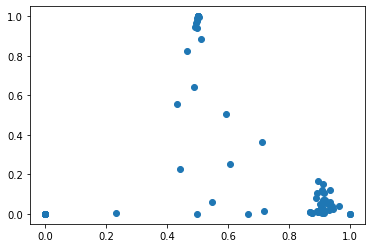

In [25]:
plt.scatter([x[0]for x in front_test],[x[1]for x in front_test])

In [28]:
front_test

[(0.890625, 0.0794979079497908),
 (0.9647058823529412, 0.03812180381218038),
 (0.8932806324110671, 0.10506741050674105),
 (1.0, 0.0009298000929800093),
 (0.9347826086956522, 0.1199442119944212),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.5001162520344106, 1.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.8695652173913043, 0.009298000929800094),
 (0.9, 0.012552301255230125),
 (0.9126984126984127, 0.05346350534635053),
 (0.8695652173913043, 0.009298000929800094),
 (0.9047619047619048, 0.04416550441655044),
 (0.9121813031161473, 0.1496978149697815),
 (0.9318181818181818, 0.01906090190609019),
 (0.9090909090909091, 0.032543003254300325),
 (1.0, 0.00046490004649000463),
 (0.9182389937106918, 0.06787540678754068),
 (0.0, 0.0),
 (0.8957816377171216, 0.1678289167828917),
 (0.875, 0.0032543003254300326),
 (0.9425287356321839, 0.03812180381218038),
 (0.916, 0.10646211064621107),
 (0.8947368421052632, 0.00790330079033008),
 (0.9097222222222222, 0.12180381218038122),
 (0.9177215189873418, 0.06741050674105067),
 (0.905405405

In [27]:
from utils.calc_pareto import get_pareto_undominated_by

front = get_pareto_undominated_by(front_test)

plt.scatter([x[0]for x in front],[x[1]for x in front])

TypeError: '>' not supported between instances of 'list' and 'tuple'

/home/mtm/MOOEasyTool/venvMOO/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


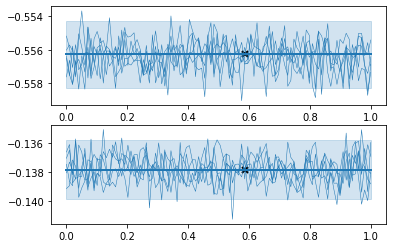

/home/mtm/MOOEasyTool/venvMOO/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration= 0  x_best= [0.28189213] y= (-0.5598705501618123, -0.13784860557768924)


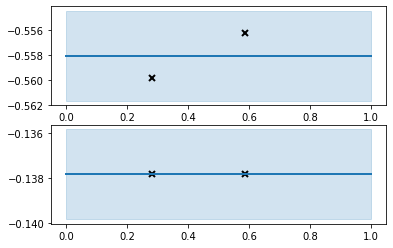

/home/mtm/MOOEasyTool/venvMOO/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration= 1  x_best= [0.0001087] y= (-0.6296296296296297, -0.013545816733067729)


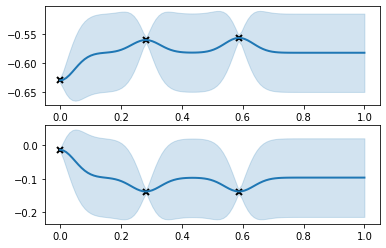

/home/mtm/MOOEasyTool/venvMOO/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration= 2  x_best= [0.40627082] y= (-0.5580645161290323, -0.13784860557768924)


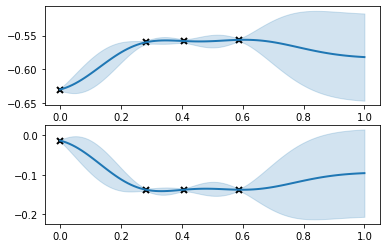

/home/mtm/MOOEasyTool/venvMOO/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration= 3  x_best= [1.] y= (-0.5562700964630225, -0.13784860557768924)


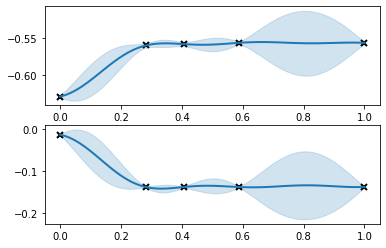

/home/mtm/MOOEasyTool/venvMOO/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration= 4  x_best= [0.80579152] y= (-0.5562700964630225, -0.13784860557768924)


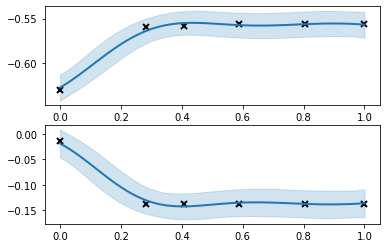

/home/mtm/MOOEasyTool/venvMOO/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration= 5  x_best= [0.0001] y= (-0.6086956521739131, -0.011155378486055778)


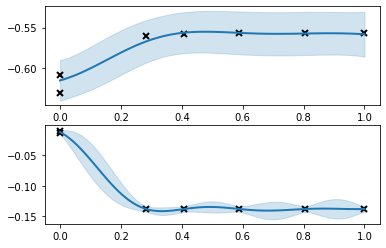

/home/mtm/MOOEasyTool/venvMOO/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration= 6  x_best= [0.69684708] y= (-0.5562700964630225, -0.13784860557768924)


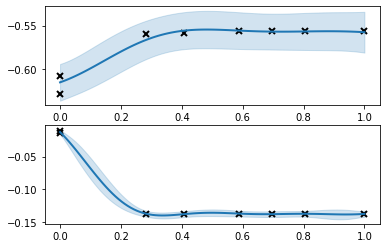

/home/mtm/MOOEasyTool/venvMOO/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration= 7  x_best= [0.92675258] y= (-0.5562700964630225, -0.13784860557768924)


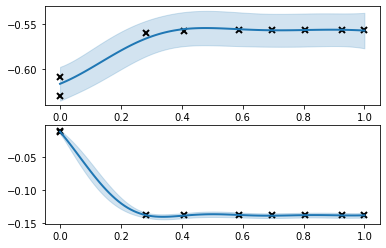

/home/mtm/MOOEasyTool/venvMOO/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration= 8  x_best= [0.33151302] y= (-0.5580645161290323, -0.13784860557768924)


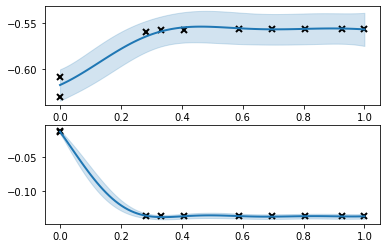

/home/mtm/MOOEasyTool/venvMOO/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration= 9  x_best= [0.33071227] y= (-0.5580645161290323, -0.13784860557768924)


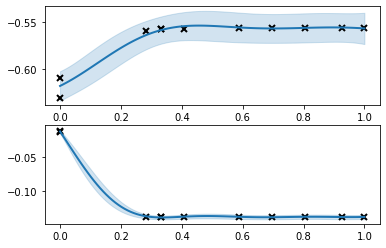

/home/mtm/MOOEasyTool/venvMOO/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration= 10  x_best= [1.] y= (-0.5562700964630225, -0.13784860557768924)


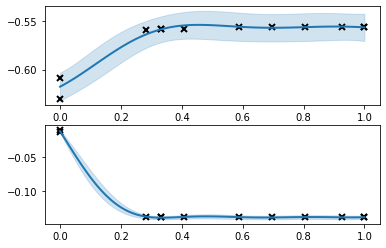

/home/mtm/MOOEasyTool/venvMOO/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration= 11  x_best= [0.6692111] y= (-0.5562700964630225, -0.13784860557768924)


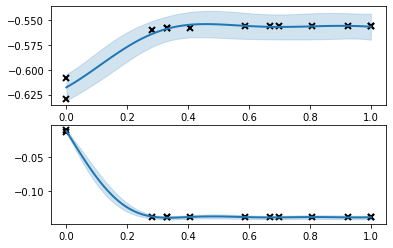

/home/mtm/MOOEasyTool/venvMOO/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration= 12  x_best= [0.326638] y= (-0.5580645161290323, -0.13784860557768924)


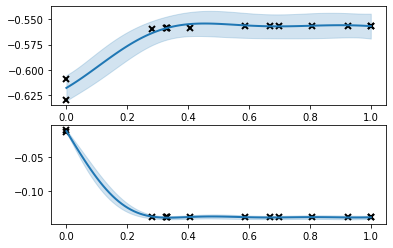

/home/mtm/MOOEasyTool/venvMOO/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration= 13  x_best= [0.85605431] y= (-0.5562700964630225, -0.13784860557768924)


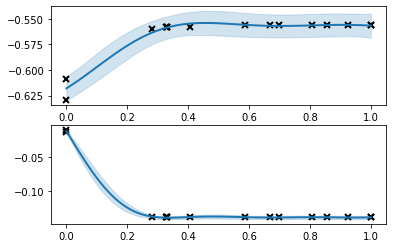

/home/mtm/MOOEasyTool/venvMOO/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration= 14  x_best= [0.29624666] y= (-0.5580645161290323, -0.13784860557768924)


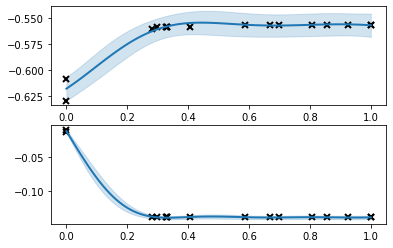

/home/mtm/MOOEasyTool/venvMOO/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration= 15  x_best= [0.18180733] y= (-0.5584415584415584, -0.13705179282868526)


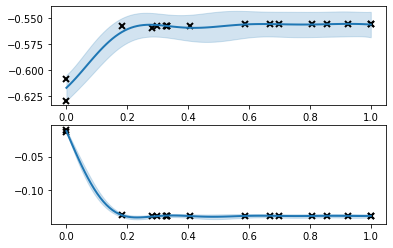

/home/mtm/MOOEasyTool/venvMOO/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration= 16  x_best= [0.48832914] y= (-0.5562700964630225, -0.13784860557768924)


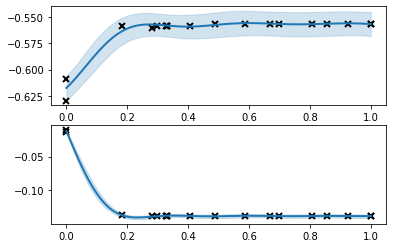

/home/mtm/MOOEasyTool/venvMOO/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration= 17  x_best= [0.22234093] y= (-0.5584415584415584, -0.13705179282868526)


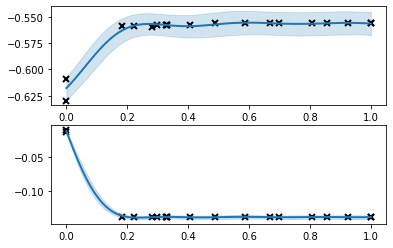

/home/mtm/MOOEasyTool/venvMOO/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration= 18  x_best= [0.1918733] y= (-0.5584415584415584, -0.13705179282868526)


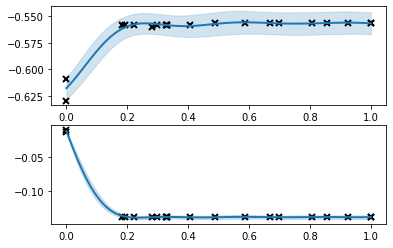

/home/mtm/MOOEasyTool/venvMOO/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration= 19  x_best= [0.17331439] y= (-0.5584415584415584, -0.13705179282868526)


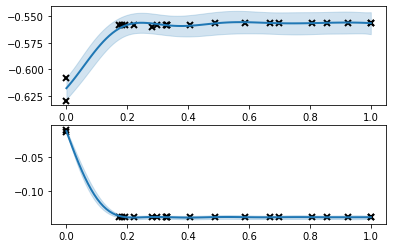

/home/mtm/MOOEasyTool/venvMOO/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration= 20  x_best= [0.10574497] y= (-0.5602605863192183, -0.13705179282868526)


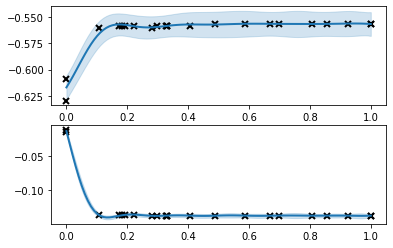

/home/mtm/MOOEasyTool/venvMOO/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration= 21  x_best= [0.13196452] y= (-0.5602605863192183, -0.13705179282868526)


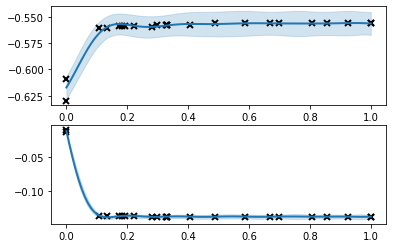

/home/mtm/MOOEasyTool/venvMOO/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration= 22  x_best= [0.75778714] y= (-0.5562700964630225, -0.13784860557768924)


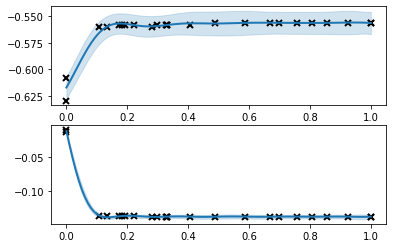

/home/mtm/MOOEasyTool/venvMOO/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration= 23  x_best= [0.10860241] y= (-0.5602605863192183, -0.13705179282868526)


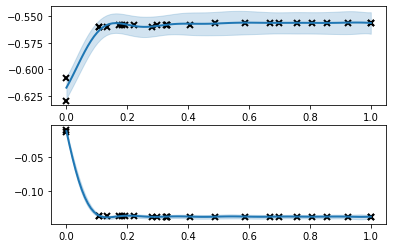

/home/mtm/MOOEasyTool/venvMOO/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration= 24  x_best= [0.09975417] y= (-0.5602605863192183, -0.13705179282868526)


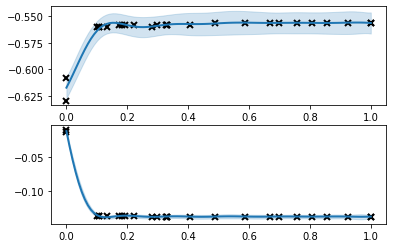

/home/mtm/MOOEasyTool/venvMOO/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration= 25  x_best= [0.08889266] y= (-0.5588235294117647, -0.1362549800796813)


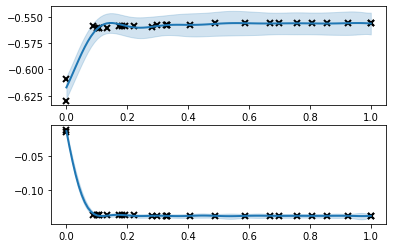

/home/mtm/MOOEasyTool/venvMOO/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration= 26  x_best= [0.53721022] y= (-0.5562700964630225, -0.13784860557768924)


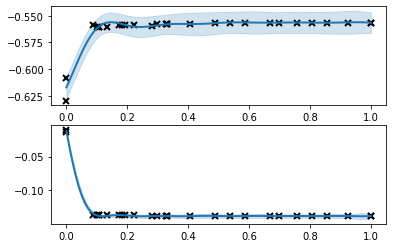

/home/mtm/MOOEasyTool/venvMOO/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration= 27  x_best= [0.07978871] y= (-0.5588235294117647, -0.1362549800796813)


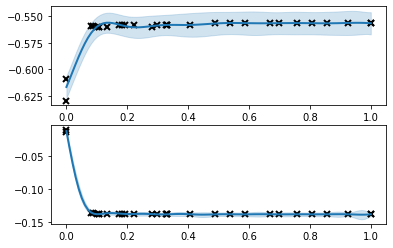

/home/mtm/MOOEasyTool/venvMOO/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration= 28  x_best= [0.07533317] y= (-0.5588235294117647, -0.1362549800796813)


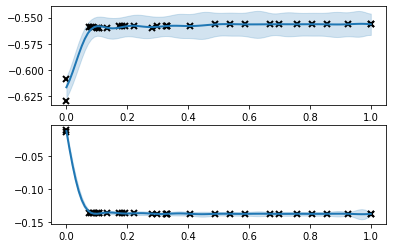

/home/mtm/MOOEasyTool/venvMOO/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration= 29  x_best= [0.96654383] y= (-0.5562700964630225, -0.13784860557768924)


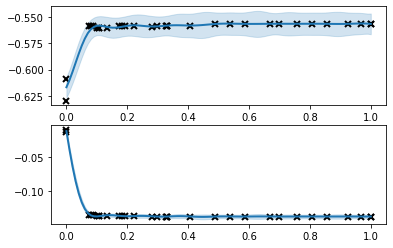

/home/mtm/MOOEasyTool/venvMOO/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration= 30  x_best= [0.44812982] y= (-0.5562700964630225, -0.13784860557768924)


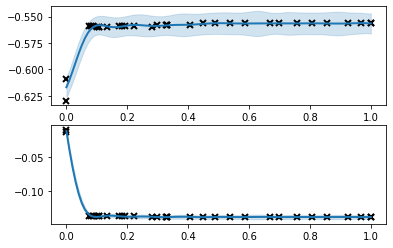

/home/mtm/MOOEasyTool/venvMOO/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration= 31  x_best= [0.62839356] y= (-0.5562700964630225, -0.13784860557768924)


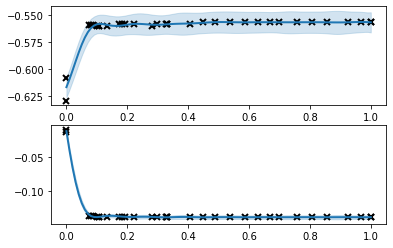

/home/mtm/MOOEasyTool/venvMOO/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration= 32  x_best= [0.06162055] y= (-0.555921052631579, -0.1346613545816733)


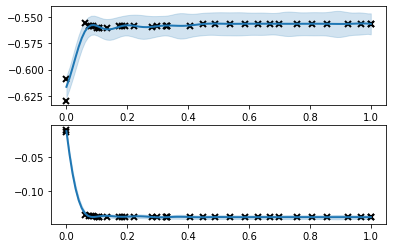

/home/mtm/MOOEasyTool/venvMOO/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration= 33  x_best= [0.89190959] y= (-0.5562700964630225, -0.13784860557768924)


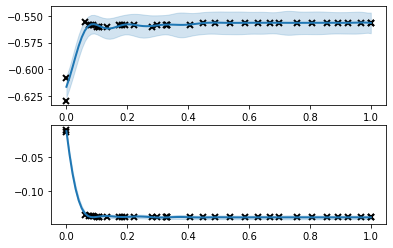

/home/mtm/MOOEasyTool/venvMOO/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration= 34  x_best= [0.38092237] y= (-0.5580645161290323, -0.13784860557768924)


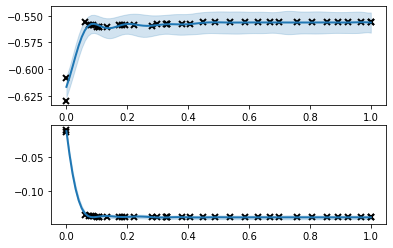

/home/mtm/MOOEasyTool/venvMOO/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration= 35  x_best= [0.05581276] y= (-0.5544554455445545, -0.13386454183266933)


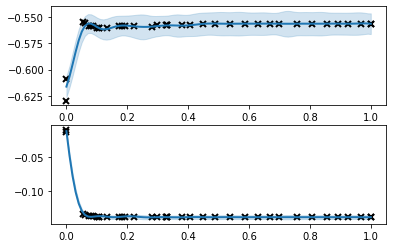

/home/mtm/MOOEasyTool/venvMOO/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration= 36  x_best= [0.72613579] y= (-0.5562700964630225, -0.13784860557768924)


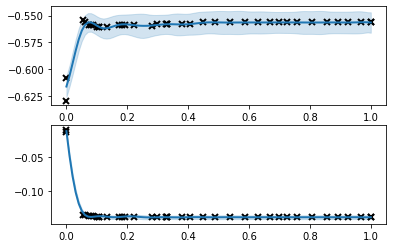

/home/mtm/MOOEasyTool/venvMOO/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration= 37  x_best= [0.25534075] y= (-0.5598705501618123, -0.13784860557768924)


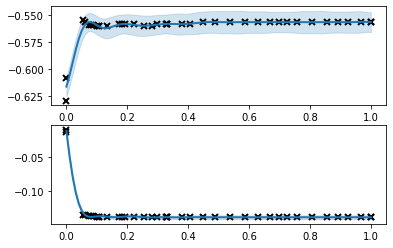

/home/mtm/MOOEasyTool/venvMOO/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration= 38  x_best= [0.04944702] y= (-0.5544554455445545, -0.13386454183266933)


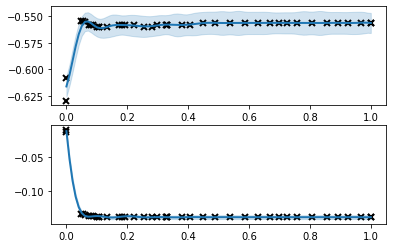

/home/mtm/MOOEasyTool/venvMOO/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Iteration= 39  x_best= [0.56430497] y= (-0.5562700964630225, -0.13784860557768924)


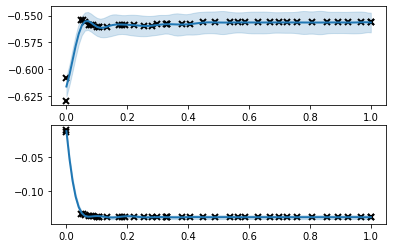

In [83]:
savename = "MOONNHeart"

### GPs Initialization
GP_l = GaussianProcess(O, C, d, lowerBounds, upperBounds, noise_variance=2e-6)

#### Initial samples, at least 1
for l in range(initial_iter):
    ## Get random evaluation point
    while True:
        x_rand = np.random.uniform(lowerBounds[0], upperBounds[0], d)
        if GP_l.X is None or not x_rand in GP_l.X:
            break
    ## EVALUATION OF THE OUTSIDE FUNCTION
    y_rand = evaluation_log_reg(x_rand)
    GP_l.addSample(x_rand,y_rand)

GP_l.updateGP()
GP_l.optimizeKernel()
GP_l.plotSamples()

for l in range(total_iter):

    ## For all acq functions but usemo
    x_best, acq_best = mes_acq(GP_l)
    
    ## For usemo
    #x_best, acq_best = usemo_acq(GP_l, function = "ei", showplots = False)

    ## EVALUATION OF THE OUTSIDE FUNCTION
    y_best = evaluation_log_reg(x_best)

    ## UPDATE
    GP_l.addSample(x_best,y_best)     ## Add new sample to the model
    GP_l.updateGP()                   ## Update data on the GP regressor
    GP_l.optimizeKernel()             ## Optimize kernel hyperparameters

    print("Iteration=", l, " x_best=", x_best, "y=", y_best)
    GP_l.plot()
    

In [84]:
results = [x for x in -GP_l.Y if x is not np.array([0,0])]

In [85]:
len(results)

41

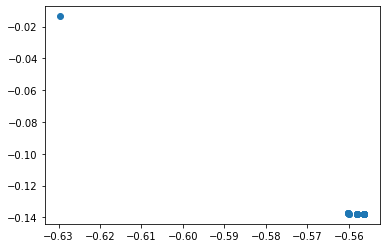

In [86]:
from utils.calc_pareto import get_pareto_undominated_by

front = get_pareto_undominated_by(GP_l.Y)

plt.scatter(front[:,0],front[:,1])

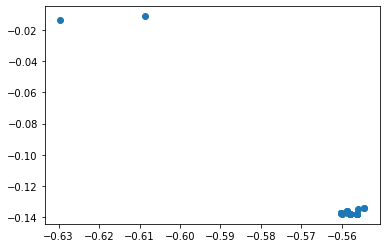

In [87]:
plt.scatter(GP_l.Y[:,0], GP_l.Y[:,1])

In [33]:
def deep_index(lst, w):
    return [(i, sub.index(w)) for (i, sub) in enumerate(lst) if w in sub]

In [51]:
archs = GP_l.X[[GP_l.Y.tolist().index(f.tolist()) for f in np.unique(front, axis=0)]]

0.00010870359067788279

/home/mtm/MOOEasyTool/venvMOO/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/mtm/MOOEasyTool/venvMOO/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/mtm/MOOEasyTool/venvMOO/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/mtm/MOOEasyTool/venvMOO/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/mtm/MOOEasyTool/venvMOO/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


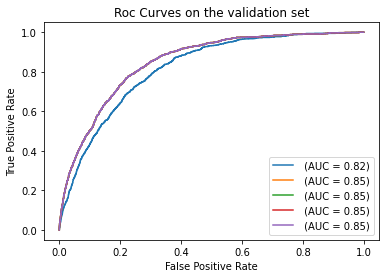

In [102]:
from sklearn.metrics import RocCurveDisplay, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

data = pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")
X = data.drop("HeartDiseaseorAttack", axis=1)
y = data["HeartDiseaseorAttack"]

X_used, _, y_used, _ = train_test_split(X, y, test_size=0.50, random_state=42, stratify=y)
X_train_val, X_test, y_train_val, y_test = train_test_split(X_used, y_used, test_size=0.3, random_state=42, stratify=y_used)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=42, stratify=y_train_val)

ax = plt.gca()
fprs = []
tprs = []
thresholds = []


for arch in archs:
    logreg = LogisticRegression(C = arch[0], max_iter = 300, random_state=42, solver="saga")
    
    logreg.fit(X_train, y_train)
    
    y_pred_train = logreg.predict(X_train)
    fpr, tpr, threshold = roc_curve(y_train, y_pred_train, drop_intermediate=False)
    
    fprs.append(fpr)
    tprs.append(tpr)
    thresholds.append(threshold)
    
    RocCurveDisplay.from_estimator(logreg, X_val, y_val, ax=ax, name="")
    # y_pred_val = logreg.predict(X_val)
    # y_pred = logreg.predict(X_test)
    
    
plt.title("Roc Curves on the validation set")
    
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()   

In [112]:
tprs

[array([0.       , 0.0136466, 1.       ]),
 array([0.        , 0.11620709, 1.        ]),
 array([0.        , 0.11705121, 1.        ]),
 array([0.        , 0.11691052, 1.        ]),
 array([0.        , 0.11691052, 1.        ])]

/home/mtm/MOOEasyTool/venvMOO/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/mtm/MOOEasyTool/venvMOO/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/mtm/MOOEasyTool/venvMOO/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/mtm/MOOEasyTool/venvMOO/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/mtm/MOOEasyTool/venvMOO/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


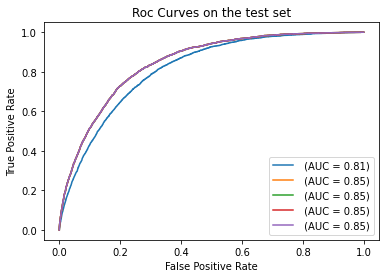

In [79]:
ax = plt.gca()

for arch in archs:
    logreg = LogisticRegression(C = arch[0], max_iter = 300, random_state=42, solver="saga")
    
    logreg.fit(X_train, y_train)
    
    
    RocCurveDisplay.from_estimator(logreg, X_test, y_test, ax=ax, name="")
    # y_pred_val = logreg.predict(X_val)
    # y_pred = logreg.predict(X_test)
    
plt.title("Roc Curves on the test set")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()   

In [91]:
y_val

175952    0.0
205449    0.0
170405    0.0
166641    0.0
241911    0.0
         ... 
225607    0.0
65200     0.0
38733     0.0
206752    0.0
46550     0.0
Name: HeartDiseaseorAttack, Length: 13319, dtype: float64

In [75]:
ax

<AxesSubplot:title={'center':'Roc Curves on the validation set'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>